<a href="https://colab.research.google.com/github/diksharai9/Handwritten-Digit-Classification/blob/main/DikshaRai_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras



from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

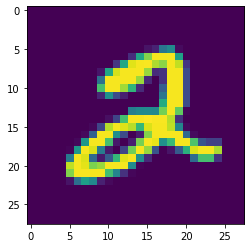

In [ ]:
plt.imshow(X_train[5])

In [ ]:
def plot_input_img(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title(y_train[i])
  plt.show()

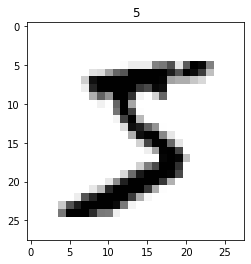

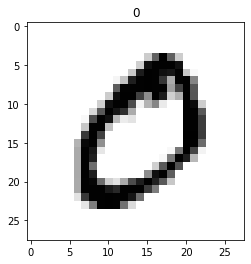

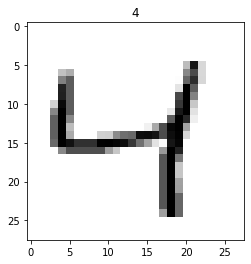

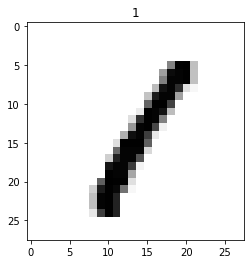

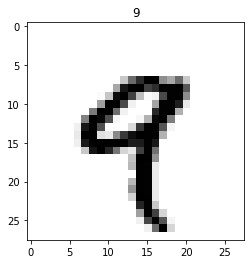

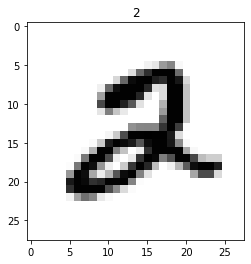

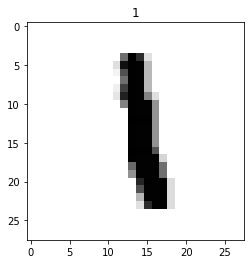

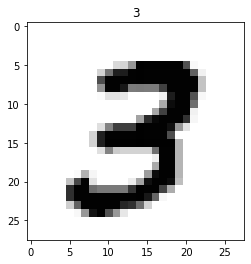

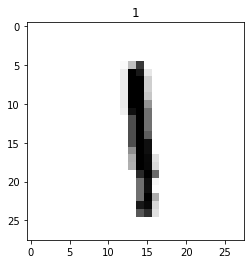

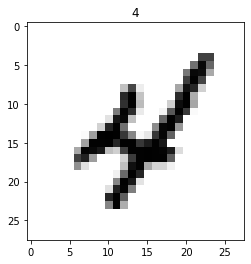

In [ ]:
for i in range(10):
  plot_input_img(i)

In [ ]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train= np.expand_dims(X_train, -1)
X_test= np.expand_dims(X_test, -1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

mc=ModelCheckpoint("./bestmodel.h5",monitor='val_acc',verbose=1,save_best_only=True)

In [ ]:
cb=[es,mc]

In [ ]:
his=model.fit(X_train , y_train , epochs=50, validation_split=0.3  )

Epoch 1/50
1313/1313 [==============================] - 43s 32ms/step - loss: 0.2434 - accuracy: 0.9262 - val_loss: 0.0774 - val_accuracy: 0.9777
Epoch 2/50
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0919 - accuracy: 0.9719 - val_loss: 0.0672 - val_accuracy: 0.9799
Epoch 3/50
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0707 - accuracy: 0.9775 - val_loss: 0.0560 - val_accuracy: 0.9831
Epoch 4/50
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0448 - val_accuracy: 0.9862
Epoch 5/50
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0406 - val_accuracy: 0.9881
Epoch 6/50
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0399 - val_accuracy: 0.9878
Epoch 7/50
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0410 -

In [ ]:
import h5py

In [ ]:
from keras.models import load_model

In [ ]:
model.save('bestmodel.h5')

In [ ]:
model_S = keras.models.load_model('bestmodel.h5')

In [ ]:
score=model_S.evaluate(X_test , y_test)
print(f"the accuracy of the model is{score[1]}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0301 - accuracy: 0.9921
the accuracy of the model is0.9921000003814697
